# Evoluční algoritmy - jednoduchý genetický algoritmus

Zkusíme si naprogramovat jednoduchý genetický algoritmus pro problém OneMAX. OneMAX je úloha, kdy chceme, aby jedinec - binární řetězec dané délky - obsahoval co nejvíce jedniček.

In [1]:
import random
import copy

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Nejprve si napíšeme funkci, jež vytvoří náhodnou populaci jedinců velikosti *population_size*, kde každý jedinec bude mít velikost *individual_size*.

In [2]:
def random_population(population_size, individual_size):
    population = list(np.random.choice([0, 1], size=(population_size, individual_size), replace=True, p=[1/2, 1/2]))
    
    # Another approach - slower:
    # population = [np.random.choice([0, 1], size=(individual_size,), replace=True, p=[1/2, 1/2]) for _ in range(population_size)]
    
    # Another approach - slowest:
    # population = list()
    # for i in range(population_size):
    #     individual = np.random.choice([0, 1], size=(individual_size,), replace=True, p=[1/2, 1/2])
    #     population.append(individual)
        
    return population

Pro každou úlohu řešenou evolučním algoritmem je důležité správně definovat fitness funkci, která bude říkat, jak moc jsou jedinci dobří vzhledem k populaci, a kterou se bude algoritmus snažit optimalizovat (nejčastěji maximalizovat). Pro OneMAX problém bude ideální fitness funkce počet jedniček v jedinci.

In [3]:
def fitness(individual):
    return np.sum(individual)

Dále si napíšeme funkci, která bude dělat selekci jedinců. Použijeme ruletovou selekci, tedy každému jedinci přiřadíme výseč rulety úměrnou jeho fitness a z této rulety pak náhodně vybíráme jedince (kde tedy lepší jedinci mají větší šanci být vybráni). Naštěstí knihovna random obsahuje funkci choices, která toto umí a nemusíme si to psát sami.

In [4]:
def selection(population, fitness_value):
    return random.choices(population, weights=fitness_value, k=len(population))

Máme vybrané dvojice jedinců, tak na nich provedeme křížení. Budeme dělat jednobodové křížení, tedy si náhodně zvolíme bod v jedinci, hodnoty před tímto bodem vezmeme z jednoho rodiče a hodnoty po tomto bodu z druhého. (V některých evolučních algoritmech vybíráme jedince do nové generace jak z těch, které vytvoříme křížením a mutací, tak z těch původních, proto je dobré neměnit jedince, které už máme, a raději si pro jejich pozměnění pořídit jejich kopii. Na druhou stranu vytváření kopie něco stojí a proto se vyplatí neplýtvat nadužíváním kopírování i v případech, kdy to není nutné.)

In [5]:
def crossover(population, crossover_prob=1):
    new_population = []
    
    for i in range(len(population)//2):
        individual1 = population[2*i]
        individual2 = population[2*i+1]
        
        if random.random() < crossover_prob:
            # We randomly choose the crossover index
            crossover_point = random.randint(1, len(individual1)-1)
            
            # np.concatanate creates a new array, hence there is no need for the deepcopying
            new_individual1 = np.concatenate([individual1[:crossover_point], individual2[crossover_point:]], axis=0)
            new_individual2 = np.concatenate([individual2[:crossover_point], individual1[crossover_point:]], axis=0)
            
        else:
            new_individual1 = individual1
            new_individual2 = individual2

        new_population.append(new_individual1)
        new_population.append(new_individual2)
        
    return new_population

Povedlo se nám vytvořit nové jedince pomocí křížení jejich rodičů. Následně na každém z nich provedeme mutaci tak, že si u každého bitu náhodně hodíme kostkou a s malou pravděpodobností ho změníme. 

In [6]:
def mutation(population, individual_mutation_prob=0.1, bit_mutation_prob=0.2):
    new_population = []
    
    for i in range(len(population)):
        individual = population[i]
        
        if random.random() < individual_mutation_prob:
            individual = copy.deepcopy(individual)
            
            for j in range(len(individual)):
                if random.random() < bit_mutation_prob:
                    # This flips 0 to 1 and 1 to 0
                    individual[j] = int(not individual[j])
                        
        new_population.append(individual)
        
    return new_population

Když už tedy máme napsané všechny funkce potřebné pro genetický algoritmus pro tento úkol, můžeme se zkusit podívat, jak by vypadal jeden krok evoluce.

In [7]:
# vytvorime si nahodnou pocatecni populaci 
population = random_population(6, 8)
print("Random population:")
print(np.array(population))

fitness_value = list(map(fitness, population))
selected_population = selection(population, fitness_value)
print("Population after selection:")
print(np.array(selected_population))

cross_population = crossover(selected_population)
print("Population after crossover:")
print(np.array(cross_population))

mutated_population = mutation(cross_population)
print("Population after mutation:")
print(np.array(mutated_population))

Random population:
[[0 0 1 0 1 1 0 0]
 [0 1 0 0 0 0 1 1]
 [0 0 1 1 0 0 0 1]
 [1 1 0 1 1 0 1 0]
 [0 1 0 0 1 1 0 0]
 [0 1 0 0 0 0 1 1]]
Population after selection:
[[0 0 1 1 0 0 0 1]
 [0 0 1 0 1 1 0 0]
 [1 1 0 1 1 0 1 0]
 [0 0 1 1 0 0 0 1]
 [1 1 0 1 1 0 1 0]
 [1 1 0 1 1 0 1 0]]
Population after crossover:
[[0 0 1 1 1 1 0 0]
 [0 0 1 0 0 0 0 1]
 [1 1 0 1 0 0 0 1]
 [0 0 1 1 1 0 1 0]
 [1 1 0 1 1 0 1 0]
 [1 1 0 1 1 0 1 0]]
Population after mutation:
[[0 0 1 1 1 1 0 0]
 [0 0 1 0 0 0 0 1]
 [1 1 0 1 0 0 0 1]
 [0 0 1 1 1 0 1 0]
 [1 1 0 1 1 0 1 0]
 [1 1 0 1 1 0 1 0]]


Vidíme, že nám jednotlivé kroky fungují, takže je na závěr spojíme do jednoho parádního genetického algoritmu, kde si tedy vytvoříme počáteční náhodnou populaci a v několika epochách budeme vždy vytvářet novou a novou populaci z té staré pomocí selekce, křížení a mutace.

In [8]:
def evolution(population_size, individual_size, max_generations):
    max_fitness = []
    population = random_population(population_size, individual_size)
    
    for _ in range(max_generations):
        fitness_value = list(map(fitness, population))
        max_fitness.append(max(fitness_value))
        
        parents = selection(population, fitness_value)
        children = crossover(parents)
        mutated_children = mutation(children)
        
        population = mutated_children
        
    # We compute fitness for the last population and obtain the best individual
    fitness_value = list(map(fitness, population))
    max_fitness.append(max(fitness_value))
    best_individual = population[np.argmax(fitness_value)]
    
    # We return our solution (the best individual), the last population and the best fitnesses observed during the algorithm run for logging purposes
    return best_individual, population, max_fitness

Na závěr tedy zkusíme náš krásný genetický algoritmus na OneMAX problém pustit a uvidíme, co se bude dít.

Best fitness: 42
Best individual: [0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1]


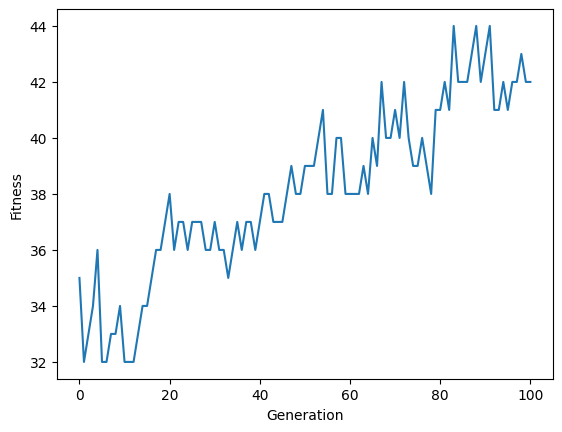

In [9]:
best, population, max_fitness = evolution(population_size=100, individual_size=50, max_generations=100)

print("Best fitness:", fitness(best))
print("Best individual:", best)


plt.plot(max_fitness)
plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.show()


##  Úkol na cvičení

Vaším úkolem bude upravit výše napsaný algoritmus tak, aby uměl vyřešit problém součtu podmnožiny. Ten spočívá v nalezení podmnožiny dané množiny takové, že součet prvků v nalezené podmnožině se přesně rovná nějakému zadanému číslu. V optimalizační verzi se tedy tento problém snaží minimalizovat rozdíl mezi zadanou hodnotou a součtem podmnožiny. Následně si zkuste hrát s různými druhy křížení, vyzkoušejte si například nahradit výše napsané jednobodové křížení za vícebodové nebo uniformní křížení a sledujte, jak se bude evoluce měnit.

Níže je kód, který vám vygeneruje zadání, tedy náhodnou množinu čísel a kýženou hodnotu, vůči které optimalizujete (ta teď odpovídá polovině součtu všech prvků).

In [10]:
random_set = [random.randint(100, 150) for _ in range(100)]    
value = sum(random_set) // 2

print(value, random_set)

6284 [106, 129, 142, 145, 101, 116, 116, 136, 110, 104, 100, 123, 108, 135, 139, 143, 114, 142, 147, 149, 116, 150, 142, 149, 125, 134, 121, 145, 105, 102, 150, 124, 101, 135, 105, 148, 114, 131, 140, 134, 109, 106, 118, 143, 142, 110, 141, 122, 127, 102, 116, 101, 149, 144, 105, 146, 110, 118, 131, 106, 148, 105, 107, 122, 135, 112, 130, 120, 148, 146, 112, 133, 123, 132, 126, 147, 123, 144, 119, 107, 130, 116, 125, 108, 125, 104, 144, 119, 116, 149, 136, 147, 120, 117, 120, 103, 124, 119, 136, 149]


## Knihovna Deap 

Výše jsme si sami zkusili napsat jednoduchý evoluční algoritmus pro OneMax problém. Nyní se podíváme na tento problém znovu a ukážeme si knihovnu, která má námi ručně psané funkce už naimplementované a usnadní nám tedy práci s psaním evolučního algoritmu, protože si ho nemusíme psát celý sami.

Deap je knihovna určená pro implementaci nejběžnějších evolučních technik jako například klasický evoluční algoritmus, genetecké programování, evoluční strategie, optimalizaci pomocí hejna a spoustu dalších metod.

### OneMax problém

K vyřešení OneMax problému je tedy potřeba definovat jedince, pak si vytvořit celou populaci a pak přidat operátory pro její evoluci. Začneme nejprve importy dalších knihoven, které budeme v naší evoluci potřebovat.

In [11]:
import array

from deap import algorithms, base, creator, tools

Protože skutečná struktura jedinců v evolučních algoritmech závisí na cílovém úkolu, DEAP neobsahuje žádnou explicitní strukturu, ale poskytuje raději metodu pro vytváření kontejneru s danými atributy, se kterými se asociuje i fitness. Této metodě se říká *deap.creator* a můžeme s její pomocí velmi jednoduchým způsobem vytvořit vlastní jedince vhodné pro daný úkol. 

Vytvoříme tedy dvě třídy: První se bude jmenovat *FitnessMax*, bude mít base class *Fitness*, ze které dědí její vlastnosti, a všechny váhy (resp. jedna jediná váha) budou 1, protože chceme maximalizovat fitness jedince (a ta se skládá jen z jedné funkce, není váženým součtem více vstupů). Druhá třída bude *Individual* a ta bude popisovat našeho jedince, který bude pole 0 a 1 a bude mít námi výše vytvořenou fitness. Námi vytvořené třídy se potom dají volat přímo z *creator*, protože jsou jeho součástí.

In [12]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

Nyní použijeme tyto třídy k vytvoření typů představujících naše jedince a pak i celou populaci jedinců. Tyto všechny objekty budou uloženy v kontejneru knihovny DEAP zvané *toolbox*. Ta obsahuje dvě metody pro přidání a odebrání obsahu -- *register()* a *unregister()*.

In [13]:
toolbox = base.Toolbox()

Nejprve si vytvoříme jedince jakožto posloupnost 1 a 0 a následně vytvoříme celou populaci. Generátor *attr_bool* zvolí náhodně buď 0, nebo 1. Dva inicializátory *individual* a *population* vytvoří instanci jednotlivce a populace. Naši jednotlivci budou generováni pomocí funkce *initRepeat()*, která opakovaně volá výše vytvořenou třídu jedince *Individual* a pomocí *attr_bool* vytváří náhodné jedince velikosti 50. Následně je obdobným způsobem vygenerována celá populace těchto náhodných jedinců.


In [14]:
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 50)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

Dále je třeba si zadefinovat fitness funkci. Ta bude velice jednoduchá, protože je potřeba pouze zjistit počet jedniček v jedinci.

In [15]:
def evalOneMax(individual):
    return sum(individual),

Teď už je jen potřeba registrace genetických operátorů, abychom mohli používat evoluci. Potřebujeme evaluaci pomocí naší výše vytvořené fitness, selekci, křížení a mutaci jedinců. Tentokrát si pro změnu zkusíme turnajovou selekci a dvoubodové křížení.

In [16]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

Nyní máme definovanou reprezentaci a genetické operátory a zbývá už jen pustit evoluci. Vytvoříme si populaci *n* jedinců, zároveň si v *hof* (Hall Of Fame) pamatujeme nejlepší jedince pro každou populaci, a nastavíme si pro zajímavost několik statistických hodnot pro každou populaci - průměr, minimum, maximum a standardní odchylku fitness. Pak už jen zbývá pustit jednoduchý evoluční algoritmus pomocí *eaSimple* na danou populaci, s daným toolboxem, pravděpodobnostmi operací a dalšími parametry.

In [17]:
# Pseudorandom generator, thanks to which all the runs are the same for easier debugging
random.seed(42)

pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg 	std    	min	max
0  	100   	25.3	3.43657	17 	34 
1  	61    	27.99	2.93085	21 	35 
2  	62    	30.16	2.41545	23 	36 
3  	66    	31.92	2.17568	27 	37 
4  	66    	33.69	1.85308	29 	38 
5  	53    	35.13	1.67126	30 	40 
6  	58    	36.25	1.43788	33 	40 
7  	73    	36.96	1.70247	32 	42 
8  	61    	38.06	1.77663	35 	44 
9  	56    	39.07	1.66286	34 	44 
10 	60    	39.89	1.73721	34 	44 
11 	59    	40.91	1.52378	36 	45 
12 	65    	41.69	1.80386	37 	46 
13 	68    	42.92	1.72441	37 	47 
14 	50    	44.03	1.53268	40 	48 
15 	68    	44.55	1.73421	40 	48 
16 	60    	45.24	1.63169	37 	49 
17 	53    	46.17	1.35687	40 	49 
18 	53    	46.79	1.34384	42 	49 
19 	60    	47.41	1.24173	42 	49 
20 	56    	47.78	1.02548	42 	49 
21 	61    	47.96	1.03846	43 	49 
22 	67    	48.2 	1.27279	43 	49 
23 	59    	48.59	1.00095	43 	49 
24 	52    	48.52	1.24483	43 	50 
25 	55    	48.47	1.24463	44 	50 
26 	61    	48.46	1.16121	44 	50 
27 	49    	48.66	1.0883 	44 	50 
28 	56    	48.64	1.26111	43 	50 
29 	60    	4

## Domácí úkol - Batoh

Za domácí úkol budete mít vyřešit pomocí evolučního algoritmu problém batohu. Ten spočívá v tom, že máme batoh kapacity K a N předmětů, každý s nějakou cenou a objemem, a chceme vybrat takové věci, abychom maximalizovali zisk a zároveň abychom nepřekročili kapacitu batohu.

[Detailní zadání](https://kam.mff.cuni.cz/~lorenc/teach/PIA_hw/homeworks-knapsack.html) je možno najít na stránkách cvičení.